In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
import seaborn as sns
import statsmodels.api as sm
import sklearn.preprocessing as sk
import seaborn as sns
from statsmodels.stats import diagnostic as dng
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
sns.set()

# création du modèle de régression linéaire

## import des variables

### variables de contrôle liées au marché du travail

In [2]:
employment_rate = pd.read_csv('./projetMODS206/code/MODS206/data/labour_market/EMP_RATE_by_birth_place_and_EDUC.csv')
min_wage = pd.read_csv('./projetMODS206/code/MODS206/data/labour_market/real minimum wage from 2001 to 2019.csv')
avg_duration_unemployment = pd.read_csv('./projetMODS206/code/MODS206/data/labour_market/average duration of unemployment.csv')
strictness_emply_protec = pd.read_csv('./projetMODS206/code/MODS206/data/labour_market/strictness of employment protection from 1998 to 2018.csv')
short_time_workers = pd.read_csv('./projetMODS206/code/MODS206/data/labour_market/percentage of short time workers from 2000.csv')
involuntary_pt_workers = pd.read_csv('./projetMODS206/code/MODS206/data/labour_market/percentage of involuntary part time workers from 2000.csv')
well_matched_skills_jobs = pd.read_csv('./projetMODS206/code/MODS206/data/labour_market/percentage of well matched skills for jobs.csv', dtype='unicode')
ft_and_pt_employ = pd.read_csv('./projetMODS206/code/MODS206/data/labour_market/percentage of full time part time employment.csv')
marginally_attached_workers = pd.read_csv('./projetMODS206/code/MODS206/data/labour_market/percentage of marginally attached workers from 2000.csv')
public_exp_LMP = pd.read_csv('./projetMODS206/code/MODS206/data/labour_market/public_exp_LMP.csv')
employees_bargain = pd.read_csv('./projetMODS206/code/MODS206/data/labour_market/percentage of employees that can bargain from 1998.csv')

### variables de contrôle liées à l'état du système éducatif

In [3]:
stratio = pd.read_csv('./projetMODS206/code/MODS206/data/education_system/student_teacher_ratio.csv')
educ_spendings = pd.read_csv('./projetMODS206/code/MODS206/data/education_system/spendings_in_education.csv')
vet_share = pd.read_csv('./projetMODS206/code/MODS206/data/education_system/share_of_VETs_from_2013_2018.csv')
neet = pd.read_csv("./projetMODS206/code/neet_rate_1997_2018.csv")
years_school = pd.read_csv("./projetMODS206/code/MODS206/data/education_system/mean-years-of-schooling-world.csv")
level_from_parents = pd.read_csv("./projetMODS206/code/MODS206/data/education_system/education_level_depending_on_those_of_the_parents_2012_2015.csv")
avg_class_size = pd.read_csv("./projetMODS206/code/MODS206/data/education_system/Avg_class_size_primary_education.csv")

### variables de contrôles économiques

In [4]:
economic_features = pd.read_csv('C://Users/User/Downloads/MODS206-master/MODS206-master/economic_features.csv').dropna(subset = ['GDP', 'CPI', 'DEBT'], inplace = False)

## création de la dataframe contenant les pays ayant toutes les variables disponibles sur une année pour chaque année

In [5]:
oecd_countries = {'AUS': 'Australia', 'AUT': 'Austria', 'BEL': 'Belgium', 'CAN': 'Canada', 'CHL': 'Chile', 'COL': 'Colombia', 'CZE': 'Czech Republic', 'DNK': 'Denmark', 'EST': 'Estonia', 'FIN': 'Finland', 'FRA': 'France', 'DEU': 'Germany', 'GRC': 'Greece', 'HUN': 'Hungary', 'ISL': 'Iceland', 'IRL': 'Ireland', 'ISR': 'Israel', 'ITA': 'Italy', 'JPN': 'Japan', 'KOR': 'Korea', 'LVA': 'Latvia', 'LTU': 'Lithuania', 'LUX': 'Luxembourg', 'MEX': 'Mexico', 'NLD': 'Netherlands', 'NZL': 'New Zealand', 'NOR': 'Norway', 'POL': 'Poland', 'PRT': 'Portugal', 'SVK': 'Slovakia', 'SVN': 'Slovenia', 'ESP': 'Spain', 'SWE': 'Sweden', 'CHE': 'Switzerland', 'TUR': 'Turkey', 'GBR': 'United Kingdom', 'USA': 'United States'}
neet_countries = neet["Country"].unique()
neet_countries_name = []
for country in neet_countries:
    neet_countries_name.append(oecd_countries[country])

In [6]:
neet = neet[neet.Subject == '15_29']
neet = neet[(neet.Time >= 2013) & (neet.Time <= 2018)]
neet = neet[['Country', 'Time', 'NEET']]

In [7]:
min_wage.dropna(axis = 0, subset = ['Value'], inplace = True) ##causal variable 
employment_rate.dropna(subset = ['Value'], inplace = True) ## seulement pour 2015 ...
avg_duration_unemployment.dropna(subset = ['Value'], inplace = True)
strictness_emply_protec.dropna(subset = ['Value'], inplace = True)
short_time_workers.dropna(subset = ['Value'], inplace = True)
involuntary_pt_workers.dropna(subset = ['Value'], inplace = True)
well_matched_skills_jobs.dropna(subset = ['Value'], inplace = True)
ft_and_pt_employ.dropna(subset = ['Value'], inplace = True)
marginally_attached_workers.dropna(subset = ['Value'], inplace = True)
public_exp_LMP.dropna(subset = ['Value'], inplace = True) ##causal variable 
employees_bargain.dropna(subset = ['Value'], inplace = True)
stratio.dropna(subset = ['Value'], inplace = True) ##causal variable 
educ_spendings.dropna(subset = ['Value'], inplace = True)
vet_share.dropna(subset = ['Value'], inplace = True)
years_school.dropna(subset = ['Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))'], inplace = True)
level_from_parents.dropna(subset = ['Value'], inplace = True) ##seulement 2012 et 2015 ...
avg_class_size.dropna(subset = ['Value'], inplace = True)
neet.dropna(subset = ['NEET'], inplace = True)

In [8]:
min_wage = min_wage[(min_wage.Time >= 2013) & (min_wage.Time <= 2018) & (min_wage.SERIES == "PPP") & (min_wage.PERIOD == "A") & (min_wage.Unit == "US Dollar")][['COUNTRY', 'Time', 'Value']]
public_exp_LMP = public_exp_LMP[(public_exp_LMP.Time >= 2013) & (public_exp_LMP.Time <= 2018) & (public_exp_LMP.PROG == 100) & (public_exp_LMP.FREQUENCY == "A")][['LFS_COUNTRY', 'Time', 'Value']]
stratio = stratio[(stratio.Year >= 2013) & (stratio.Year <= 2018) & (stratio.ISC11_LEVEL_CAT == "L3")][['COUNTRY', 'Year', 'Value']]

In [9]:
well_matched_skills_jobs = well_matched_skills_jobs.astype({"Year" : int})
educ_spendings = educ_spendings[educ_spendings.Year != "Latest year"]
educ_spendings = educ_spendings.astype({"Year" : int})

In [10]:
avg_duration_unemployment = avg_duration_unemployment[(avg_duration_unemployment.Time >= 2013) & (avg_duration_unemployment.Time <= 2018)]
strictness_emply_protec = strictness_emply_protec[(strictness_emply_protec.Time >= 2013) & (strictness_emply_protec.Time <= 2018)]
short_time_workers = short_time_workers[(short_time_workers.Time >= 2013) & (short_time_workers.Time <= 2018)]
involuntary_pt_workers = involuntary_pt_workers[(involuntary_pt_workers.Time >= 2013) & (involuntary_pt_workers.Time <= 2018)]
well_matched_skills_jobs = well_matched_skills_jobs[(well_matched_skills_jobs.Year >= 2013) & (well_matched_skills_jobs.Year <= 2018)] #do after
ft_and_pt_employ = ft_and_pt_employ[(ft_and_pt_employ.Time >= 2013) & (ft_and_pt_employ.Time <= 2018)]
marginally_attached_workers = marginally_attached_workers[(marginally_attached_workers.Time >= 2013) & (marginally_attached_workers.Time <= 2018)]
employees_bargain = employees_bargain[(employees_bargain.Year >= 2013) & (employees_bargain.Year <= 2018)]
educ_spendings = educ_spendings[(educ_spendings.Year >= 2013) & (educ_spendings.Year <= 2018)]
vet_share = vet_share[(vet_share.Year >= 2013) & (vet_share.Year <= 2018)]
years_school = years_school[(years_school.Year >= 2013) & (years_school.Year <= 2018)]
avg_class_size = avg_class_size[(avg_class_size.Year >= 2013) & (avg_class_size.Year <= 2018)]
economic_features = economic_features[(economic_features.Time >= 2013) & (economic_features.Time < 2019)]

In [11]:
avg_duration_unemployment = avg_duration_unemployment[(avg_duration_unemployment.Age == "Total") & (avg_duration_unemployment.Sex == "All persons")]
avg_duration_unemployment = avg_duration_unemployment[['COUNTRY', 'Time', 'Value']]
strictness_emply_protec = strictness_emply_protec[strictness_emply_protec.Series == "Version 4 (2013-2019)"][['COUNTRY', 'Time', 'Value']]
short_time_workers.rename(columns = {"Employment status" : "status"}, inplace = True)
short_time_workers = short_time_workers[(short_time_workers.Age == "Total") & (short_time_workers.status == "Total employment") & (short_time_workers.Sex == "All persons")][['COUNTRY', 'Time', 'Value']]
involuntary_pt_workers.rename(columns = {"Employment status" : "status"}, inplace = True)
involuntary_pt_workers = involuntary_pt_workers[(involuntary_pt_workers.Age == "Total") & (involuntary_pt_workers.status == "Total employment") & (involuntary_pt_workers.Sex == "All persons") & (involuntary_pt_workers.SERIES == "SHINV_PT")][['COUNTRY', 'Time', 'Value']]
ft_and_pt_employ = ft_and_pt_employ[(ft_and_pt_employ.Sex == 'All persons') & (ft_and_pt_employ.Age == '25 to 54') & (ft_and_pt_employ.Series == 'Part-time employment') & (ft_and_pt_employ.EMPSTAT == "TE")][['COUNTRY', 'Time', 'Value']]
marginally_attached_workers = marginally_attached_workers[(marginally_attached_workers.Sex == 'All persons') & (marginally_attached_workers.Age == 'Total')][['COUNTRY', 'Time', 'Value']]
employees_bargain = employees_bargain[['COU', 'Year', 'Value']]
vet_share = vet_share[(vet_share.ISC11_LEVEL_CAT == 'L4_C5_SW')][['COUNTRY', 'Year', 'Value']]
years_school = years_school[['Entity', 'Year', 'Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))']]
avg_class_size = avg_class_size[(avg_class_size.ISC11_LEVEL_CAT == "L2") & (avg_class_size.REF_SECTOR == "INST_T") & (avg_class_size.INDICATOR == "PERS_AVG_CLASS")][['COUNTRY', 'Year', 'Value']]
educ_spendings = educ_spendings[(educ_spendings.ISC11 == "L1") & (educ_spendings.REF_SECTOR == "S13") & (educ_spendings.COUNTERPART_SECTOR == "INST_T")][['COUNTRY', 'Year', 'Value']]

In [12]:
stratio.rename(columns = {"COUNTRY" : "Country", 'Year' : 'Time', 'Value' : 'stratio'}, inplace = True)
public_exp_LMP.rename(columns = {"LFS_COUNTRY" : "Country", 'Value' : 'public_exp_LMP'}, inplace = True)
min_wage.rename(columns = {"COUNTRY" : "Country", 'Value' : "min_wage"}, inplace = True)
employees_bargain.rename(columns = {"Year" : "Time"}, inplace = True)
vet_share.rename(columns = {"Year" : "Time"}, inplace = True)
years_school.rename(columns = {"Year" : "Time"}, inplace = True)
avg_class_size.rename(columns = {"Year" : "Time"}, inplace = True)
educ_spendings.rename(columns = {"Year" : "Time"}, inplace = True)
years_school.rename(columns = {"Entity" : "Country"}, inplace = True)
employees_bargain.rename(columns = {"COU" : "Country"}, inplace = True)
avg_duration_unemployment.rename(columns = {"COUNTRY" : "Country"}, inplace = True)
strictness_emply_protec.rename(columns = {"COUNTRY" : "Country"}, inplace = True)
short_time_workers.rename(columns = {"COUNTRY" : "Country"}, inplace = True)
involuntary_pt_workers.rename(columns = {"COUNTRY" : "Country"}, inplace = True)
ft_and_pt_employ.rename(columns = {"COUNTRY" : "Country"}, inplace = True)
marginally_attached_workers.rename(columns = {"COUNTRY" : "Country"}, inplace = True)
vet_share.rename(columns = {"COUNTRY" : "Country"}, inplace = True)
avg_class_size.rename(columns = {"COUNTRY" : "Country"}, inplace = True)
educ_spendings.rename(columns = {"COUNTRY" : "Country"}, inplace = True)

In [13]:
avg_duration_unemployment.rename(columns = {'Value' : 'avg_unemploy'}, inplace = True)
strictness_emply_protec.rename(columns = {'Value' : 'protection of workers'}, inplace = True)
short_time_workers.rename(columns = {'Value' : 'short_time_workers'}, inplace = True)
involuntary_pt_workers.rename(columns = {'Value' : 'involuntary_pt_workers'}, inplace = True)
ft_and_pt_employ.rename(columns = {'Value' : 'ft_and_pt_employ'}, inplace = True)
marginally_attached_workers.rename(columns = {'Value' : 'marginally_attached_workers'}, inplace = True)
employees_bargain.rename(columns = {'Value' : 'employees_bargain'}, inplace = True)
vet_share.rename(columns = {'Value' : 'vet_share'}, inplace = True)
years_school.rename(columns = {'Average Total Years of Schooling for Adult Population (Lee-Lee (2016), Barro-Lee (2018) and UNDP (2018))' : 'years_schooling'}, inplace = True)
avg_class_size.rename(columns = {'Value' : 'avg_class_size'}, inplace = True)
educ_spendings.rename(columns = {'Value' : 'educ_spendings'}, inplace = True)

In [15]:
intersect = list(set(strictness_emply_protec['Country'].unique()) & set(short_time_workers['Country'].unique()) & set(involuntary_pt_workers['Country'].unique()) & set(ft_and_pt_employ['Country'].unique()) & set(marginally_attached_workers['Country'].unique()) & set(employees_bargain['Country'].unique()) & set(avg_class_size['Country'].unique()) & set(educ_spendings['Country'].unique()) & set(min_wage['Country'].unique()) & set(public_exp_LMP['Country'].unique()) & set(stratio['Country'].unique()))

In [16]:
for country in intersect:
    print(list(set(strictness_emply_protec[strictness_emply_protec.Country == country]['Time'].unique()) & set(short_time_workers[short_time_workers.Country == country]['Time'].unique()) & set(involuntary_pt_workers[involuntary_pt_workers.Country == country]['Time'].unique()) & set(ft_and_pt_employ[ft_and_pt_employ.Country == country]['Time'].unique()) & set(marginally_attached_workers[marginally_attached_workers.Country == country]['Time'].unique()) & set(employees_bargain[employees_bargain.Country == country]['Time'].unique()) & set(avg_class_size[avg_class_size.Country == country]['Time'].unique()) & set(educ_spendings[educ_spendings.Country == country]['Time'].unique()) & set(min_wage[min_wage.Country == country]['Time'].unique()) & set(public_exp_LMP[public_exp_LMP.Country == country]['Time'].unique()) & set(stratio[stratio.Country == country]['Time'].unique())))

[2013, 2014]
[2013, 2014, 2015]
[2015]
[2016, 2014, 2015]
[2014]
[2015]
[2016, 2013, 2014, 2015]
[2015]
[2015]
[2013, 2014, 2015]
[2013, 2014, 2015]
[2016, 2017, 2015]
[2013, 2014, 2015]
[2016, 2014]


In [21]:
l = []
for country in neet_countries:
    for year in {2013, 2014, 2015, 2016, 2017, 2018}:
        dict = {}
        avg_unemploy = False
        protection_of_workers = False
        st_workers = False
        in_pt_workers = False
        ft_and_pt_employment = False
        marginally_att_workers = False
        emplo_bargain = False
        vetshare = False
        years_schooling = False
        avgclass_size = False
        educspendings = False
        gdp = False
        cpi = False
        debt = False
        neet_rate = False
        wage = False
        spendings_LMP = False
        strat = False
        if country in avg_duration_unemployment['Country'].unique():
            if year in avg_duration_unemployment[avg_duration_unemployment.Country == country]['Time'].unique():
                avg_unemploy = avg_duration_unemployment[(avg_duration_unemployment.Country == country) & (avg_duration_unemployment.Time == year)]['avg_unemploy'].values[0]
        if country in strictness_emply_protec['Country'].unique():
            if year in strictness_emply_protec[strictness_emply_protec.Country == country]['Time'].unique():
                protection_of_workers = strictness_emply_protec[(strictness_emply_protec.Country == country) & (strictness_emply_protec.Time == year)]['protection of workers'].values[0]
        if country in short_time_workers['Country'].unique():
            if year in short_time_workers[short_time_workers.Country == country]['Time'].unique():
                st_workers = short_time_workers[(short_time_workers.Country == country) & (short_time_workers.Time == year)]['short_time_workers'].values[0]
        if country in involuntary_pt_workers['Country'].unique():
            if year in involuntary_pt_workers[involuntary_pt_workers.Country == country]['Time'].unique():
                in_pt_workers = involuntary_pt_workers[(involuntary_pt_workers.Country == country) & (involuntary_pt_workers.Time == year)]['involuntary_pt_workers'].values[0]
        if country in ft_and_pt_employ['Country'].unique():
            if year in ft_and_pt_employ[ft_and_pt_employ.Country == country]['Time'].unique():
                ft_and_pt_employment = ft_and_pt_employ[(ft_and_pt_employ.Country == country) & (ft_and_pt_employ.Time == year)]['ft_and_pt_employ'].values[0]
        if country in marginally_attached_workers['Country'].unique():
            if year in marginally_attached_workers[marginally_attached_workers.Country == country]['Time'].unique():
                marginally_att_workers = marginally_attached_workers[(marginally_attached_workers.Country == country) & (marginally_attached_workers.Time == year)]['marginally_attached_workers'].values[0]
        if country in employees_bargain['Country'].unique():
            if year in employees_bargain[employees_bargain.Country == country]['Time'].unique():
                emplo_bargain = employees_bargain[(employees_bargain.Country == country) & (employees_bargain.Time == year)]['employees_bargain'].values[0]
        if country in vet_share['Country'].unique():
            if year in vet_share[vet_share.Country == country]['Time'].unique():
                vetshare = vet_share[(vet_share.Country == country) & (vet_share.Time == year)]['vet_share'].values[0]
        if oecd_countries[country] in years_school['Country'].unique():
            if year in years_school[years_school.Country == oecd_countries[country]]['Time'].unique():
                years_schooling = years_school[(years_school.Country == oecd_countries[country]) & (years_school.Time == year)]['years_schooling'].values[0]
        if country in avg_class_size['Country'].unique():
            if year in avg_class_size[avg_class_size.Country == country]['Time'].unique():
                avgclass_size = avg_class_size[(avg_class_size.Country == country) & (avg_class_size.Time == year)]['avg_class_size'].values[0]
        if country in educ_spendings['Country'].unique():
            if year in educ_spendings[educ_spendings.Country == country]['Time'].unique():
                educspendings = educ_spendings[(educ_spendings.Country == country) & (educ_spendings.Time == year)]['educ_spendings'].values[0]
        if country in economic_features['Country'].unique():
            if year in economic_features[economic_features.Country == country]['Time'].unique():
                gdp = economic_features[(economic_features.Country == country) & (economic_features.Time == year)]['GDP'].values[0]
        if country in economic_features['Country'].unique():
            if year in economic_features[economic_features.Country == country]['Time'].unique():
                cpi = economic_features[(economic_features.Country == country) & (economic_features.Time == year)]['CPI'].values[0]
        if country in economic_features['Country'].unique():
            if year in economic_features[economic_features.Country == country]['Time'].unique():
                debt = economic_features[(economic_features.Country == country) & (economic_features.Time == year)]['DEBT'].values[0]
        if country in neet['Country'].unique():
            if year in neet[neet.Country == country]['Time'].unique():
                neet_rate = neet[(neet.Country == country) & (neet.Time == year)]['NEET'].values[0]
        if country in min_wage['Country'].unique():
            if year in min_wage[min_wage.Country == country]['Time'].unique():
                wage = min_wage[(min_wage.Country == country) & (min_wage.Time == year)]['min_wage'].values[0]
        if country in public_exp_LMP['Country'].unique():
            if year in public_exp_LMP[public_exp_LMP.Country == country]['Time'].unique():
                spendings_LMP = public_exp_LMP[(public_exp_LMP.Country == country) & (public_exp_LMP.Time == year)]['public_exp_LMP'].values[0]
        if country in stratio['Country'].unique():
            if year in stratio[stratio.Country == country]['Time'].unique():
                strat = stratio[(stratio.Country == country) & (stratio.Time == year)]['stratio'].values[0]
        
        
        if (protection_of_workers != False) and (st_workers != False) and (in_pt_workers != False) and (ft_and_pt_employment != False) and (marginally_att_workers != False) and (emplo_bargain != False) and (years_schooling != False) and (avgclass_size != False) and (educspendings != False) and (gdp != False) and (cpi != False) and (debt != False) and (neet_rate != False) and (wage != False) and (spendings_LMP != False) and (strat != False):
            dict = {"Country" : country, "Time" : year, 'protection_of_workers' : protection_of_workers, 'short_time_workers' : st_workers, 'involuntary_pt_workers' : in_pt_workers, 'ft_and_pt_employ' : ft_and_pt_employment, 'marginally_attached_workers' : marginally_att_workers, 'employees_bargain' : emplo_bargain, 'years_schooling' : years_schooling, 'avg_class_size' : avgclass_size, 'educspendings' : educspendings, 'gdp' : gdp, 'cpi' : cpi, 'debt' : debt, 'neet' : neet_rate, 'min_wage' : wage, 'public_exp_LMP' : spendings_LMP, 'stratio' : strat}
            l.append(dict)
global_data = pd.DataFrame(l)
                
                
                
                
                
                
                
                
            
                    
                    
                
        
            
        

In [36]:
global_data

,Country,Time,protection_of_workers,short_time_workers,involuntary_pt_workers,ft_and_pt_employ,marginally_attached_workers,employees_bargain,years_schooling,avg_class_size,educspendings,gdp,cpi,debt,neet,min_wage,public_exp_LMP,stratio
0,AUS,2016,1.700,0.892538,27.952453,19.342875,5.644458,60.0,12.9,22.158,8795.3633,49971.131456,1.276991,68.39156,11.352150,23915.419580,0.86,12.121
1,AUS,2014,1.700,0.532556,28.277395,18.917433,5.584873,60.1,12.7,23.785,8107.4346,62510.791171,2.487923,61.36842,12.647472,23356.492667,0.93,12.101
2,EST,2015,1.934,0.526973,12.138937,6.022114,4.059337,18.6,12.7,18.148,5838.8569,17522.230186,-0.492326,12.63388,12.848400,8264.357819,0.63,15.229
3,FRA,2014,2.812,0.077543,38.833678,12.448917,1.401585,98.5,11.4,25.262,6860.5566,43011.263103,0.507759,120.15510,16.251743,21745.708496,3.02,11.100
4,DEU,2015,2.332,0.071631,12.823948,20.294353,1.446233,56.8,14.1,24.056,8419.0049,41086.729674,0.514421,80.04520,8.567577,23382.762030,1.52,12.997
5,HUN,2013,1.767,0.068582,40.694778,3.827516,5.205054,25.5,12.0,20.863,5169.8901,13687.514059,1.733200,97.39288,20.482632,8268.343744,1.21,12.040
6,HUN,2014,1.767,0.055691,38.601627,3.546781,3.941362,22.8,11.8,20.851,3480.1599,14267.012155,-0.227566,100.81930,17.478123,8583.174144,1.21,12.487
7,LVA,2013,2.708,0.226769,37.869604,6.081749,5.817492,15.3,12.7,14.420,5851.5640,15120.781889,-0.029455,45.54675,15.771196,6342.214871,0.55,10.194
8,LVA,2014,2.708,0.191482,34.866267,5.042816,4.753176,15.3,12.9,14.779,6474.9941,15713.536973,0.620492,50.89373,14.520842,7101.521415,0.55,10.042
9,LVA,2015,2.708,0.181045,30.270922,5.353419,4.193578,14.8,12.8,15.038,6594.3418,13774.605274,0.174241,46.16284,12.961889,7951.462567,0.55,9.748


46 observations avec tout sans avg_unemploy et vet_share, 18 avec avg_unemploy sans les variables education

## régression sans prendre en compte l'influence des pays et des années

### check pour multicollinéarité

In [48]:
# define two data frames one before the drop and one after the drop
no_countrytime_data = global_data.drop(columns = ['Country', 'Time'], axis = 1)
no_countrytime_data_checked = no_countrytime_data.drop(columns = ['employees_bargain', 'min_wage', 'years_schooling', 'ft_and_pt_employ', 'avg_class_size', 'gdp', 'marginally_attached_workers', 'educspendings'], axis = 1)

# the VFI does expect a constant term in the data, so we need to add one using the add_constant method
X1 = sm.tools.add_constant(no_countrytime_data)
X2 = sm.tools.add_constant(no_countrytime_data_checked)

# create the series for both
series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)
series_after = pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)

# display the series
print('DATA BEFORE')
print('-'*100)
display(series_before)

print('DATA AFTER')
print('-'*100)
display(series_after)

DATA BEFORE
----------------------------------------------------------------------------------------------------


const                          20658.083472
protection_of_workers             27.214059
short_time_workers                13.154342
involuntary_pt_workers            13.622887
ft_and_pt_employ                  36.632847
marginally_attached_workers       18.384914
employees_bargain                201.175361
years_schooling                  152.126408
avg_class_size                    76.280071
educspendings                     24.128375
gdp                               34.798155
cpi                                4.890567
debt                              24.882448
neet                              47.221175
min_wage                          96.900447
public_exp_LMP                    43.942985
stratio                           13.897599
dtype: float64

DATA AFTER
----------------------------------------------------------------------------------------------------


const                     374.516295
protection_of_workers       2.438841
short_time_workers          1.398713
involuntary_pt_workers      2.881273
cpi                         1.322037
debt                        2.361739
neet                        4.317802
public_exp_LMP              3.871644
stratio                     2.105360
dtype: float64

### OLS

In [50]:
regression = sm.OLS.from_formula('neet ~ protection_of_workers + short_time_workers + involuntary_pt_workers + cpi + debt + public_exp_LMP + stratio', no_countrytime_data_checked).fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   neet   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     7.110
Date:                Tue, 30 Mar 2021   Prob (F-statistic):           0.000757
Time:                        16:12:49   Log-Likelihood:                -48.769
No. Observations:                  23   AIC:                             113.5
Df Residuals:                      15   BIC:                             122.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 15.2142      9.279      1.640      0.122      -4.565      34.993
protection_of_workers     -2.0172      2.041     -0.989      0.339      -6.367       2.332
short_time_workers        -1.9219      2.637     -0.729      0.477      -7.542       3.698
involuntary_pt_workers     0.1314      0.036      3.690      0.002       0.055       0.207
cpi                       -0.3672      0.669     -0.549      0.591      -1.794       1.059
debt                       0.0048      0.023      0.210      0.836      -0.044       0.053
public_exp_LMP             2.0770      0.975      2.130      0.050      -0.002       4.156
stratio                   -0.1328      0.406     -0.327      0.748      -0.998       0.733
==============================================================================
Omnibus:                        3.013   Durbin-Watson:                   1.566
Prob(Omnibus):                  0.222   Jarque-Bera (JB):                1.977
Skew:                          -0.718   Prob(JB):                        0.372
Kurtosis:                       3.057   Cond. No.                     1.85e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### are residuals homoscedastic? 

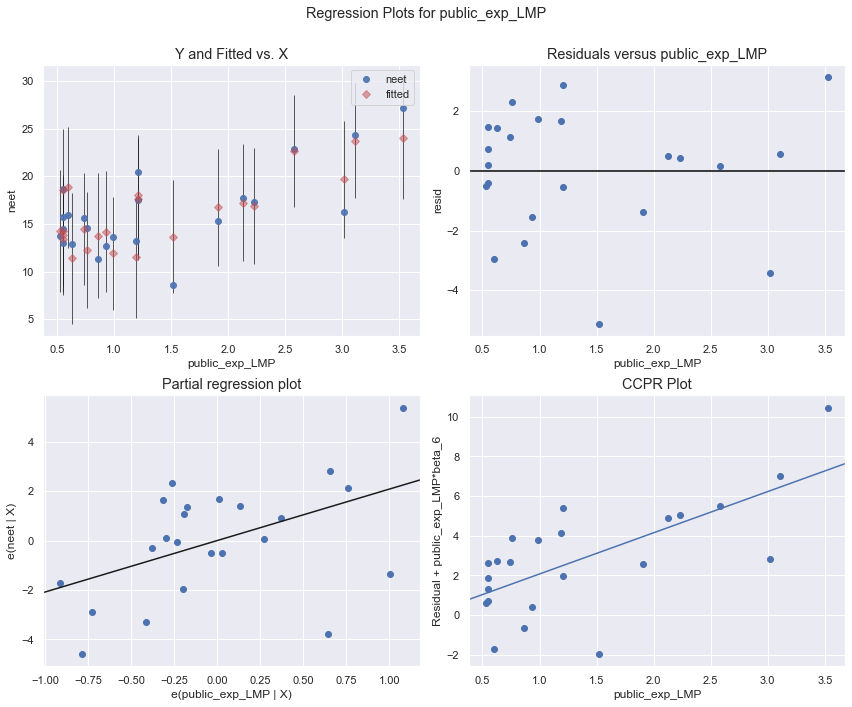

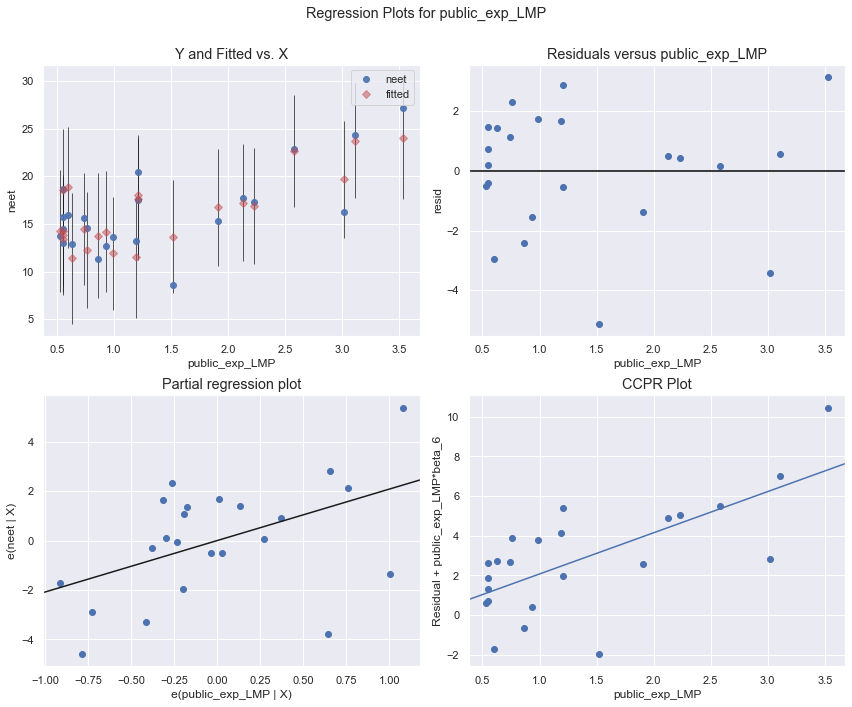

In [52]:
fig = plt.figure(figsize = (12,10))
sm.graphics.plot_regress_exog(regression, 'public_exp_LMP', fig = fig)

In [53]:
pvalue = dng.het_breuschpagan(regression.resid, regression.model.exog)[1]
if pvalue > 0.05:
    print("there is no heteroscedasticity", pvalue)
else:
    print("it is heteroskedastic", pvalue)

there is no heteroscedasticity 0.33734826880052565


## régression en introduisant des variables binaires pour les pays

In [71]:
notime_data = pd.get_dummies(global_data["Country"], drop_first = True)
notime_data = pd.concat([global_data, notime_data], axis = 1)
notime_data.drop(columns = "Country", inplace = True)

In [72]:
notime_data.columns

Index(['Time', 'protection_of_workers', 'short_time_workers',
       'involuntary_pt_workers', 'ft_and_pt_employ',
       'marginally_attached_workers', 'employees_bargain', 'years_schooling',
       'avg_class_size', 'educspendings', 'gdp', 'cpi', 'debt', 'neet',
       'min_wage', 'public_exp_LMP', 'stratio', 'DEU', 'ESP', 'EST', 'FRA',
       'HUN', 'LTU', 'LVA', 'POL', 'PRT', 'SVK', 'SVN'],
      dtype='object')

### check pour multicollinéarité en forçant pour avoir public_exp_LMP dans le modèle

In [92]:
# define two data frames one before the drop and one after the drop
no_time_data = notime_data.drop(columns = ['Time'], axis = 1)
no_time_data_checked = no_time_data.drop(columns = ['DEU', 'ESP', 'EST', 'HUN', 'LTU', 'LVA', 'POL', 'employees_bargain', 'years_schooling', 'PRT', 'ft_and_pt_employ', 'min_wage', 'involuntary_pt_workers', 'avg_class_size', 'protection_of_workers', 'educspendings', 'marginally_attached_workers', 'gdp', 'debt'], axis = 1)

# the VFI does expect a constant term in the data, so we need to add one using the add_constant method
X1 = sm.tools.add_constant(no_time_data)
X2 = sm.tools.add_constant(no_time_data_checked)

# create the series for both
series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)
series_after = pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)

# display the series
print('DATA BEFORE')
print('-'*100)
display(series_before)

print('DATA AFTER')
print('-'*100)
display(series_after)

DATA BEFORE
----------------------------------------------------------------------------------------------------


const                          0.0
protection_of_workers          inf
short_time_workers             inf
involuntary_pt_workers         inf
ft_and_pt_employ               inf
marginally_attached_workers    inf
employees_bargain              inf
years_schooling                inf
avg_class_size                 inf
educspendings                  inf
gdp                            inf
cpi                            inf
debt                           inf
neet                           inf
min_wage                       inf
public_exp_LMP                 inf
stratio                        inf
DEU                            inf
ESP                            inf
EST                            inf
FRA                            inf
HUN                            inf
LTU                            inf
LVA                            inf
POL                            inf
PRT                            inf
SVK                            inf
SVN                            inf
dtype: float64

DATA AFTER
----------------------------------------------------------------------------------------------------


const                 91.844214
short_time_workers     1.689637
cpi                    1.183356
neet                   2.884564
public_exp_LMP         3.783266
stratio                1.607917
FRA                    1.739962
SVK                    1.707603
SVN                    1.556730
dtype: float64

### OLS

In [94]:
country_regression = sm.OLS.from_formula('neet ~ short_time_workers + cpi + public_exp_LMP + stratio + FRA + SVK + SVN', no_time_data_checked).fit()
country_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   neet   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     4.038
Date:                Tue, 30 Mar 2021   Prob (F-statistic):             0.0111
Time:                        16:42:14   Log-Likelihood:                -53.407
No. Observations:                  23   AIC:                             122.8
Df Residuals:                      15   BIC:                             131.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             13.2271      5.061      2.614      0.020       2.441      24.014
short_time_workers    -4.2117      3.440     -1.224      0.240     -11.544       3.120
cpi                   -0.1852      0.781     -0.237      0.816      -1.850       1.479
public_exp_LMP         4.1270      0.822      5.019      0.000       2.374       5.880
stratio               -0.1134      0.435     -0.261      0.798      -1.040       0.813
FRA                   -7.7596      3.601     -2.155      0.048     -15.434      -0.085
SVK                    3.1948      2.837      1.126      0.278      -2.852       9.242
SVN                   -1.2970      2.336     -0.555      0.587      -6.277       3.683
==============================================================================
Omnibus:                       23.909   Durbin-Watson:                   2.298
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.282
Skew:                          -1.878   Prob(JB):                     6.58e-10
Kurtosis:                       8.478   Cond. No.                         97.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### are residuals heteroskedastic ? 

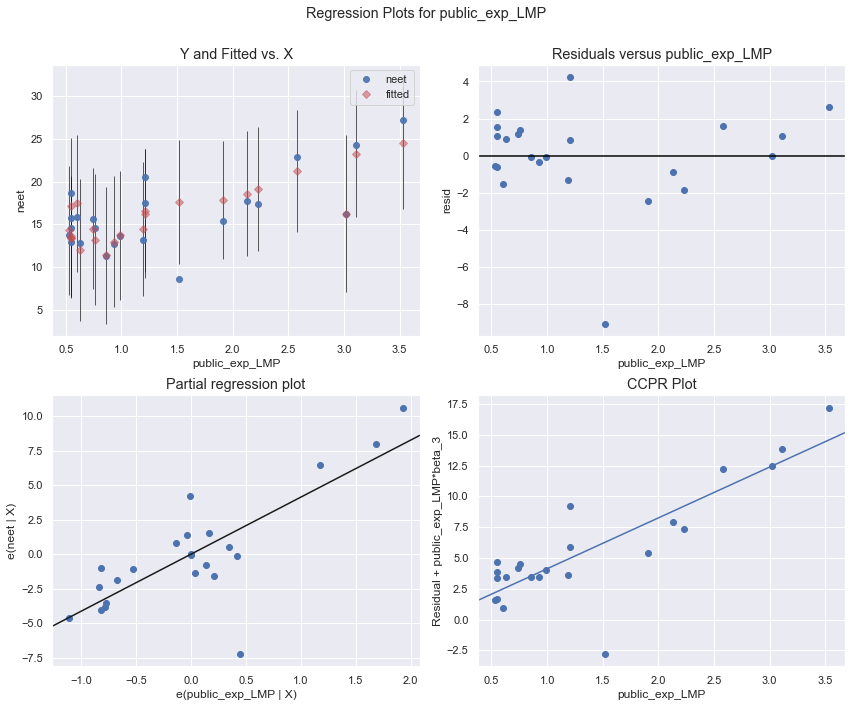

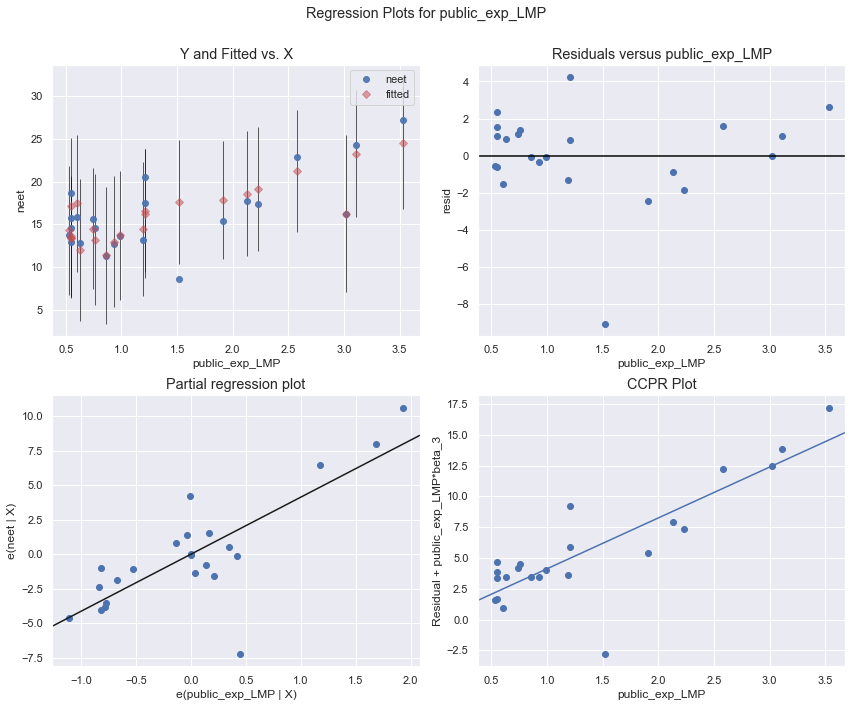

In [95]:
fig = plt.figure(figsize = (12,10))
sm.graphics.plot_regress_exog(country_regression, 'public_exp_LMP', fig = fig)

In [96]:
pvalue = dng.het_breuschpagan(country_regression.resid, country_regression.model.exog)[1]
if pvalue > 0.05:
    print("there is no heteroscedasticity", pvalue)
else:
    print("it is heteroskedastic", pvalue)

there is no heteroscedasticity 0.44014681986727844


## régression en introduisant des variables binaires pour les années

In [111]:
nocountry_data = pd.get_dummies(global_data["Time"], drop_first = True)
nocountry_data = pd.concat([global_data, nocountry_data], axis = 1)
nocountry_data.drop(columns = "Time", inplace = True)

In [112]:
nocountry_data

,Country,protection_of_workers,short_time_workers,involuntary_pt_workers,ft_and_pt_employ,marginally_attached_workers,employees_bargain,years_schooling,avg_class_size,educspendings,gdp,cpi,debt,neet,min_wage,public_exp_LMP,stratio,2014,2015,2016
0,AUS,1.700,0.892538,27.952453,19.342875,5.644458,60.0,12.9,22.158,8795.3633,49971.131456,1.276991,68.39156,11.352150,23915.419580,0.86,12.121,0,0,1
1,AUS,1.700,0.532556,28.277395,18.917433,5.584873,60.1,12.7,23.785,8107.4346,62510.791171,2.487923,61.36842,12.647472,23356.492667,0.93,12.101,1,0,0
2,EST,1.934,0.526973,12.138937,6.022114,4.059337,18.6,12.7,18.148,5838.8569,17522.230186,-0.492326,12.63388,12.848400,8264.357819,0.63,15.229,0,1,0
3,FRA,2.812,0.077543,38.833678,12.448917,1.401585,98.5,11.4,25.262,6860.5566,43011.263103,0.507759,120.15510,16.251743,21745.708496,3.02,11.100,1,0,0
4,DEU,2.332,0.071631,12.823948,20.294353,1.446233,56.8,14.1,24.056,8419.0049,41086.729674,0.514421,80.04520,8.567577,23382.762030,1.52,12.997,0,1,0
5,HUN,1.767,0.068582,40.694778,3.827516,5.205054,25.5,12.0,20.863,5169.8901,13687.514059,1.733200,97.39288,20.482632,8268.343744,1.21,12.040,0,0,0
6,HUN,1.767,0.055691,38.601627,3.546781,3.941362,22.8,11.8,20.851,3480.1599,14267.012155,-0.227566,100.81930,17.478123,8583.174144,1.21,12.487,1,0,0
7,LVA,2.708,0.226769,37.869604,6.081749,5.817492,15.3,12.7,14.420,5851.5640,15120.781889,-0.029455,45.54675,15.771196,6342.214871,0.55,10.194,0,0,0
8,LVA,2.708,0.191482,34.866267,5.042816,4.753176,15.3,12.9,14.779,6474.9941,15713.536973,0.620492,50.89373,14.520842,7101.521415,0.55,10.042,1,0,0
9,LVA,2.708,0.181045,30.270922,5.353419,4.193578,14.8,12.8,15.038,6594.3418,13774.605274,0.174241,46.16284,12.961889,7951.462567,0.55,9.748,0,1,0


### check pour la multicollinéarité

In [128]:
# define two data frames one before the drop and one after the drop
no_country_data = nocountry_data.drop(columns = ['Country'], axis = 1)
no_country_data_checked = no_country_data.drop(columns = ['employees_bargain', 'protection_of_workers', 'min_wage', 'years_schooling', 'gdp', 'avg_class_size', 'involuntary_pt_workers', 'marginally_attached_workers', 2015, 'debt'], axis = 1)

# the VFI does expect a constant term in the data, so we need to add one using the add_constant method
X1 = sm.tools.add_constant(no_country_data)
X2 = sm.tools.add_constant(no_country_data_checked)

# create the series for both
series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)
series_after = pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)

# display the series
print('DATA BEFORE')
print('-'*100)
display(series_before)

print('DATA AFTER')
print('-'*100)
display(series_after)

DATA BEFORE
----------------------------------------------------------------------------------------------------


const                          27368.375965
protection_of_workers             92.556104
short_time_workers                17.616940
involuntary_pt_workers            79.701310
ft_and_pt_employ                  71.153652
marginally_attached_workers       27.057393
employees_bargain                319.352728
years_schooling                  173.192275
avg_class_size                   136.461479
educspendings                     71.791404
gdp                              107.374025
cpi                               20.834647
debt                              46.724922
neet                             112.221567
min_wage                         129.688489
public_exp_LMP                   138.964744
stratio                           22.501426
2014                              12.397441
2015                              12.023782
2016                              31.065418
dtype: float64

DATA AFTER
----------------------------------------------------------------------------------------------------


const                 173.087625
short_time_workers      1.538904
ft_and_pt_employ        2.325701
educspendings           2.541573
cpi                     1.389210
neet                    3.706053
public_exp_LMP          3.682215
stratio                 1.337696
2014                    1.094366
2016                    1.374710
dtype: float64

### OLS

In [133]:
no_country_data_checked.rename(columns = {2014 : "year_2014", 2016 : "year_2016"}, inplace = True)

In [134]:
time_regression = sm.OLS.from_formula('neet ~ short_time_workers + ft_and_pt_employ + educspendings + cpi + public_exp_LMP + stratio + year_2014 + year_2016', no_country_data_checked).fit()
time_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   neet   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     4.736
Date:                Tue, 30 Mar 2021   Prob (F-statistic):            0.00560
Time:                        17:07:10   Log-Likelihood:                -50.526
No. Observations:                  23   AIC:                             119.1
Df Residuals:                      14   BIC:                             129.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             20.5967      5.318      3.873      0.002       9.191      32.002
short_time_workers     0.7737      3.137      0.247      0.809      -5.955       7.503
ft_and_pt_employ      -0.1630      0.162     -1.004      0.332      -0.511       0.185
educspendings         -0.0016      0.001     -2.706      0.017      -0.003      -0.000
cpi                    0.5041      0.762      0.661      0.519      -1.131       2.139
public_exp_LMP         3.3945      0.805      4.219      0.001       1.669       5.120
stratio                0.2176      0.358      0.607      0.553      -0.551       0.986
year_2014             -0.0567      1.278     -0.044      0.965      -2.797       2.684
year_2016              1.1796      2.400      0.491      0.631      -3.968       6.327
==============================================================================
Omnibus:                        1.958   Durbin-Watson:                   1.354
Prob(Omnibus):                  0.376   Jarque-Bera (JB):                1.385
Skew:                          -0.378   Prob(JB):                        0.500
Kurtosis:                       2.066   Cond. No.                     6.22e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### are the residuals heteroskedastic ? 

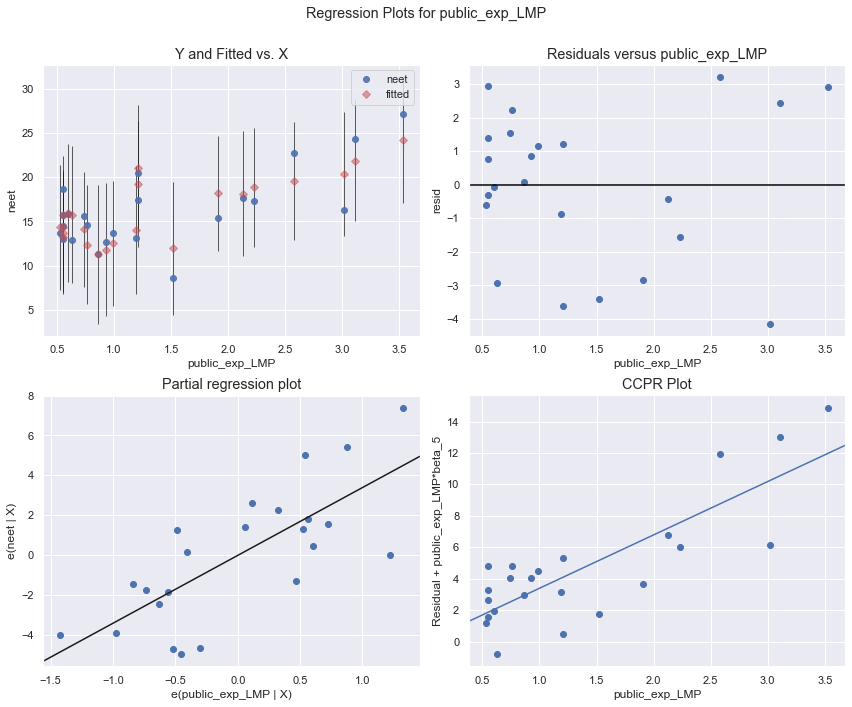

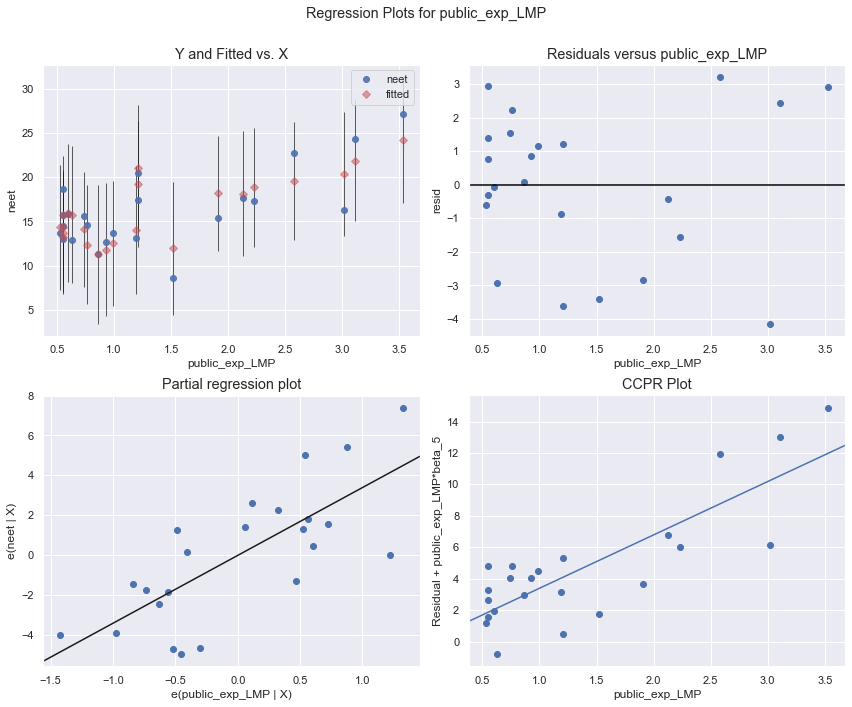

In [135]:
fig = plt.figure(figsize = (12,10))
sm.graphics.plot_regress_exog(time_regression, 'public_exp_LMP', fig = fig)

In [136]:
pvalue = dng.het_breuschpagan(time_regression.resid, time_regression.model.exog)[1]
if pvalue > 0.05:
    print("there is no heteroscedasticity", pvalue)
else:
    print("it is heteroskedastic", pvalue)

there is no heteroscedasticity 0.05236501021338979


## régression with fixed effects and time-fixed effects

In [138]:
all_data = pd.get_dummies(global_data["Time"], drop_first = True)
all_data = pd.concat([global_data, all_data], axis = 1)
all_data.drop(columns = "Time", inplace = True)
df = pd.get_dummies(all_data['Country'], drop_first = True)
all_data = pd.concat([all_data, df], axis = 1)
all_data.drop(columns = "Country", inplace = True)

In [139]:
all_data

,protection_of_workers,short_time_workers,involuntary_pt_workers,ft_and_pt_employ,marginally_attached_workers,employees_bargain,years_schooling,avg_class_size,educspendings,gdp,...,ESP,EST,FRA,HUN,LTU,LVA,POL,PRT,SVK,SVN
0,1.700,0.892538,27.952453,19.342875,5.644458,60.0,12.9,22.158,8795.3633,49971.131456,...,0,0,0,0,0,0,0,0,0,0
1,1.700,0.532556,28.277395,18.917433,5.584873,60.1,12.7,23.785,8107.4346,62510.791171,...,0,0,0,0,0,0,0,0,0,0
2,1.934,0.526973,12.138937,6.022114,4.059337,18.6,12.7,18.148,5838.8569,17522.230186,...,0,1,0,0,0,0,0,0,0,0
3,2.812,0.077543,38.833678,12.448917,1.401585,98.5,11.4,25.262,6860.5566,43011.263103,...,0,0,1,0,0,0,0,0,0,0
4,2.332,0.071631,12.823948,20.294353,1.446233,56.8,14.1,24.056,8419.0049,41086.729674,...,0,0,0,0,0,0,0,0,0,0
5,1.767,0.068582,40.694778,3.827516,5.205054,25.5,12.0,20.863,5169.8901,13687.514059,...,0,0,0,1,0,0,0,0,0,0
6,1.767,0.055691,38.601627,3.546781,3.941362,22.8,11.8,20.851,3480.1599,14267.012155,...,0,0,0,1,0,0,0,0,0,0
7,2.708,0.226769,37.869604,6.081749,5.817492,15.3,12.7,14.420,5851.5640,15120.781889,...,0,0,0,0,0,1,0,0,0,0
8,2.708,0.191482,34.866267,5.042816,4.753176,15.3,12.9,14.779,6474.9941,15713.536973,...,0,0,0,0,0,1,0,0,0,0
9,2.708,0.181045,30.270922,5.353419,4.193578,14.8,12.8,15.038,6594.3418,13774.605274,...,0,0,0,0,0,1,0,0,0,0


### check pour multicollinéarité

In [161]:
# define two data frames one before the drop and one after the drop
all_data_checked = all_data.drop(columns = ['employees_bargain', 'DEU', 'EST', 'ESP', 'HUN', 'LTU', 2015, 'LVA', 'gdp', 'ft_and_pt_employ', 'PRT', 'years_schooling', 'protection_of_workers', 'avg_class_size', 'involuntary_pt_workers', 'educspendings', 'marginally_attached_workers', 'min_wage', 'debt'], axis = 1)

# the VFI does expect a constant term in the data, so we need to add one using the add_constant method
X1 = sm.tools.add_constant(all_data)
X2 = sm.tools.add_constant(all_data_checked)

# create the series for both
series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)
series_after = pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)

# display the series
print('DATA BEFORE')
print('-'*100)
display(series_before)

print('DATA AFTER')
print('-'*100)
display(series_after)

DATA BEFORE
----------------------------------------------------------------------------------------------------


const                          0.0
protection_of_workers          inf
short_time_workers             inf
involuntary_pt_workers         inf
ft_and_pt_employ               inf
marginally_attached_workers    inf
employees_bargain              inf
years_schooling                inf
avg_class_size                 inf
educspendings                  inf
gdp                            inf
cpi                            inf
debt                           inf
neet                           inf
min_wage                       inf
public_exp_LMP                 inf
stratio                        inf
2014                           inf
2015                           inf
2016                           inf
DEU                            inf
ESP                            inf
EST                            inf
FRA                            inf
HUN                            inf
LTU                            inf
LVA                            inf
POL                            inf
PRT                 

DATA AFTER
----------------------------------------------------------------------------------------------------


const                 92.314610
short_time_workers     2.294711
cpi                    1.274690
neet                   3.002620
public_exp_LMP         3.975644
stratio                1.622675
2014                   1.335809
2016                   2.140485
FRA                    1.986274
POL                    1.198806
SVK                    2.650645
SVN                    1.568363
dtype: float64

### OLS

In [163]:
all_data_checked.rename(columns = {2014 : "year_2014", 2016 : "year_2016"}, inplace = True)

In [164]:
full_regression = sm.OLS.from_formula('neet ~ short_time_workers + cpi + public_exp_LMP + stratio + year_2014 + year_2016 + FRA + POL + SVK + SVN', all_data_checked).fit()
full_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   neet   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     2.403
Date:                Tue, 30 Mar 2021   Prob (F-statistic):             0.0763
Time:                        17:20:25   Log-Likelihood:                -52.946
No. Observations:                  23   AIC:                             127.9
Df Residuals:                      12   BIC:                             140.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             12.5540      5.644      2.224      0.046       0.257      24.851
short_time_workers    -3.3202      4.506     -0.737      0.475     -13.139       6.498
cpi                   -0.1022      0.889     -0.115      0.910      -2.040       1.835
public_exp_LMP         4.0748      0.950      4.289      0.001       2.005       6.145
stratio               -0.0925      0.479     -0.193      0.850      -1.136       0.951
year_2014              0.5713      1.686      0.339      0.741      -3.102       4.245
year_2016             -1.1600      3.609     -0.321      0.753      -9.024       6.704
FRA                   -7.8430      4.260     -1.841      0.090     -17.125       1.439
POL                    1.5544      3.721      0.418      0.684      -6.553       9.662
SVK                    3.9324      3.871      1.016      0.330      -4.501      12.366
SVN                   -1.2004      2.573     -0.467      0.649      -6.806       4.405
==============================================================================
Omnibus:                       20.971   Durbin-Watson:                   2.264
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.290
Skew:                          -1.641   Prob(JB):                     3.58e-08
Kurtosis:                       8.001   Cond. No.                         107.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

prob(F-statistic) is bigger than 0.07 then it is meaningful to make a joint null-hypothesis to check